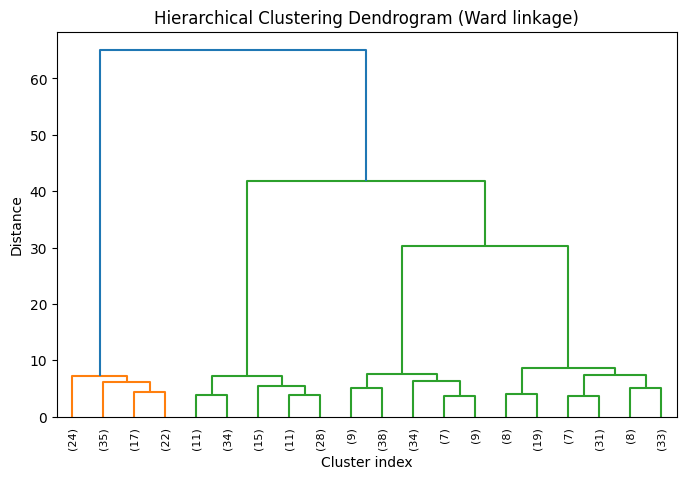

Silhouette score: 0.624
Davies-Bouldin score: 0.529


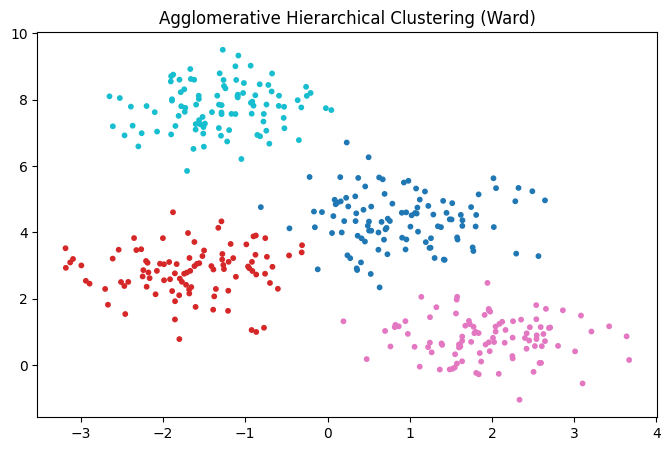

In [2]:
# ==== Cell 1: Install & imports ====
!pip install scipy scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams["figure.figsize"] = (8, 5)

# ==== Cell 2: Data ====
X, y_true = make_blobs(
    n_samples=400, centers=4, cluster_std=0.7, random_state=0
)

# ==== Cell 3: Dendrogram ====
Z = linkage(X, method="ward")
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=90, leaf_font_size=8)
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.show()

# ==== Cell 4: Fit model & evaluate ====
hc = AgglomerativeClustering(
    n_clusters=4,
    linkage="ward"      # metric is implicitly 'euclidean' for ward
)

labels = hc.fit_predict(X)

sil = silhouette_score(X, labels)
db  = davies_bouldin_score(X, labels)

print(f"Silhouette score: {sil:.3f}")
print(f"Davies-Bouldin score: {db:.3f}")

# ==== Cell 5: Visualize ====
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=10)
plt.title("Agglomerative Hierarchical Clustering (Ward)")
plt.show()
